In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [16]:
data =  pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
#подставляем все параметры в нашу модель для предсказания цены.

from sklearn.metrics import mean_absolute_error

X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Bias: 36.45948838509017
Error: 3.2708628109003186


In [6]:
3.27/y.mean()

0.14512173730002803

Получаем велечину ошибки 14.5% Попробуем больше проанализировать данные, чтобы достичь лучших результатов

По показателью преступности видим, что при высоком уровне преступности, очень сильно падает цена жилья.
при преступности выше 10. Цена жилья средняя - 12, а целом по датасету, почти в 2 раза выше 22.
поэтому данный показатель оставляем:

In [7]:
data['CRIM'].value_counts()

14.33370    2
0.01501     2
0.08265     1
1.35472     1
0.03615     1
           ..
0.11460     1
0.03237     1
5.82115     1
0.02187     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64

In [11]:
data[data['CRIM' ] > 10 ].mean()

CRIM        21.967222
ZN           0.000000
INDUS       18.100000
CHAS         0.000000
NOX          0.670870
RM           5.791593
AGE         93.827778
DIS          1.714774
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          246.582963
LSTAT       22.791111
MEDV        12.340741
dtype: float64

In [12]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [17]:
data['ZN'].value_counts()


0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [19]:
#Выше видно, что очень много нулевых значений, можем попробовать заменить на ср. значения, но результата на модель это не дает.
data['ZN'] = data['ZN'].replace( 0, data['ZN'].mean() )

In [20]:
data['ZN'].value_counts()


11.363636     372
20.000000      21
80.000000      15
12.500000      10
25.000000      10
22.000000      10
40.000000       7
30.000000       6
45.000000       6
90.000000       5
95.000000       4
21.000000       4
60.000000       4
33.000000       4
35.000000       3
28.000000       3
55.000000       3
52.500000       3
70.000000       3
34.000000       3
75.000000       3
82.500000       2
85.000000       2
17.500000       1
100.000000      1
18.000000       1
Name: ZN, dtype: int64

In [21]:
data['INDUS'].value_counts()
#насколько я понял, этот показатель показывает рядом колво ритейл магазинов. Это должно влиять на стоимость, если магазинов мало
#Оставляем

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64

In [22]:
data['CHAS'].value_counts()
#непонятный показатель. Убираем

0    471
1     35
Name: CHAS, dtype: int64

In [23]:
data['NOX'].value_counts()
#непонятный показатель. Убираем

0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.435     1
0.422     1
0.518     1
0.385     1
0.389     1
Name: NOX, Length: 81, dtype: int64

In [24]:
data['RM'].value_counts()
#кол-во комнат должно влиять на дата сет. оставляем

6.405    3
5.713    3
6.167    3
6.127    3
6.229    3
        ..
6.701    1
6.232    1
6.593    1
6.800    1
6.625    1
Name: RM, Length: 446, dtype: int64

In [25]:
data['AGE'].value_counts()
#непонимаю, зачем этот показатель. Убираем.

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
         ..
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [26]:
data['DIS'].value_counts()
#чем ближе к бизнес центрам, по идее будет дороже жилье. Оставляем

3.4952    5
5.2873    4
5.4007    4
5.7209    4
6.8147    4
         ..
1.7659    1
4.4534    1
2.1000    1
4.0905    1
1.8125    1
Name: DIS, Length: 412, dtype: int64

In [27]:
data['RAD'].value_counts()
#не уверен, что это нужно

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [28]:
data['TAX'].value_counts()
#по идее чем больше налогов, тем дороже жилье

666    132
307     40
403     30
437     15
304     14
      ... 
280      1
313      1
351      1
422      1
285      1
Name: TAX, Length: 66, dtype: int64

In [29]:
data['B'].value_counts().head()
#непонимаю, зачем этот показатель. Убираем.

396.90    121
395.24      3
393.74      3
393.23      2
394.72      2
Name: B, dtype: int64

In [30]:
data['PTRATIO'].value_counts().head()
#непонимаю, зачем этот показатель. Убираем.

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
Name: PTRATIO, dtype: int64

In [31]:
data['LSTAT'].value_counts().head()
#Оставляем

14.10    3
6.36     3
18.13    3
8.05     3
7.79     3
Name: LSTAT, dtype: int64

In [32]:
data.drop(['CHAS', 'RAD','B','PTRATIO'], axis=1, inplace=True)

In [33]:

#Давайте отфильтруем датасет с низким уровнем преступности, чтобы лучше спрогнозировать оставшиеся данные
data2 = data[data['CRIM' ] < 7 ]

In [34]:
data2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,LSTAT,MEDV
0,0.00632,18.000000,2.31,0.538,6.575,65.2,4.0900,296,4.98,24.0
1,0.02731,11.363636,7.07,0.469,6.421,78.9,4.9671,242,9.14,21.6
2,0.02729,11.363636,7.07,0.469,7.185,61.1,4.9671,242,4.03,34.7
3,0.03237,11.363636,2.18,0.458,6.998,45.8,6.0622,222,2.94,33.4
4,0.06905,11.363636,2.18,0.458,7.147,54.2,6.0622,222,5.33,36.2


In [35]:
#подставляем обработанные параметры в модель.

from sklearn.metrics import mean_absolute_error

X = data2[['CRIM', 'ZN', 'INDUS','RM', 'TAX', 'LSTAT','DIS']]
y = data2['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data2[['CRIM', 'ZN', 'INDUS','RM', 'TAX', 'LSTAT','DIS']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 0.53053564  0.06019211 -0.05466508  6.40111819 -0.01165458 -0.50579388
 -1.01592124]
Bias: -3.6902316433838855
Error: 3.137381635266152


In [36]:
y.mean()

24.32874109263658

Ошибка чуть чуть уменьшилось, но особо эффекта нет.


Можно также таким способом решить задачу:

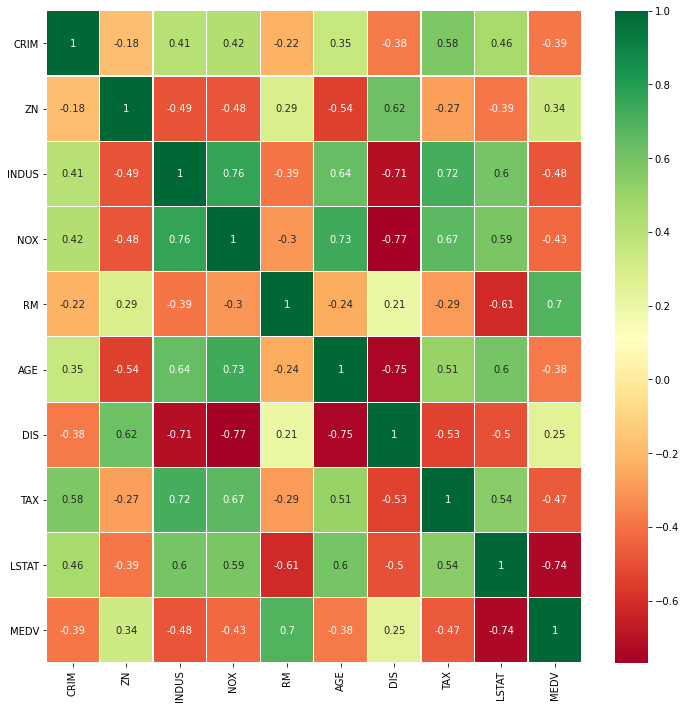

In [37]:
#построим матрицу корреляций

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Из матрицы корреляций видим, что основной показатель влияющий на MEDV это RM. (ну и LSTAT еще)

In [38]:
#возьмем, только этот показатель для модели

from sklearn.metrics import mean_absolute_error

X = data[['RM']]
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['RM']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [9.10210898]
Bias: -34.67062077643851
Error: 4.4477729015322325


Что то еще хуже все стало.

Видимо лучше оставить все как было изначально.

Не понимаю, как ошибку можно уменьшить